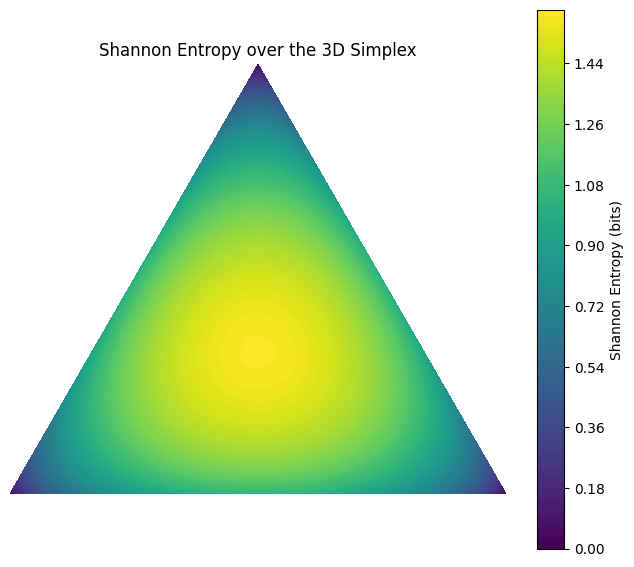

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

# Generate points on the 3D simplex
resolution = 200
p1 = []
p2 = []
for i in range(resolution):
    for j in range(resolution - i):
        p1.append(i / resolution)
        p2.append(j / resolution)

p1 = np.array(p1)
p2 = np.array(p2)
p3 = 1 - p1 - p2

# Coordinates for 2D projection
x = 0.5 * (2 * p2 + p3)
y = (np.sqrt(3) / 2) * p3

# Compute Shannon entropy safely: 0 log 0 := 0
def shannon_entropy(p):
    p = np.clip(p, 1e-12, 1.0)  # Avoid log(0)
    return -np.sum(p * np.log2(p), axis=-1)

H = shannon_entropy(np.stack([p1, p2, p3], axis=-1))

# Triangulation
triang = tri.Triangulation(x, y)

# Plot
plt.figure(figsize=(8, 7))
plt.tricontourf(triang, H, levels=100, cmap='viridis')
plt.colorbar(label="Shannon Entropy (bits)")
plt.title("Shannon Entropy over the 3D Simplex")
plt.axis("off")
plt.gca().set_aspect('equal')
plt.show()
